# AutoARIMA em Python (BIBLIOTECA *PMDARIMA*)

Uma das metodologias mais conhecidas em séries temporais é a Box-Jenkins, que são um conjunto de procedimentos que são realizados em uma certa sequência até encontramos o melhor modelo ARIMA. Porém, ao invés de realizarmos as etapas dessa metodologia, podemos escolher o modelo de forma automática e para isso existe a função auto.arima que é muito usada no software estatístico R. 

O objetivo desse pequeno projeto é usar o autoarima do pacote pmdarima (que não é um pacote muito conhecido do python) para previsão de séries temporais. Uma das vantagens do autoarima é que não é necessário interpretar as funções de autocorrelação e autocorrelação parcial para escolher o parâmetros p, P, d, D, q e Q. Podemos definí-los e o autoarima irá fazer as combinações desses parâmetros e gerará os AIC's e escolhe-se então o modelo de menor AIC.

Usaremos uma base de dados de uma série temporal de consumo de energia elétrica que pode ser obtida [aqui](https://www.kaggle.com/zero101010/consumo-eletricocsv). A série tem periodicidade mensal e vai do ano de 1985 até o ano de 2017.

## Importando das bibliotecas

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
%matplotlib inline

from pmdarima.arima import auto_arima

In [2]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6

## Importando da base de dados

Irei colocar os dados indexados no formato de tempo correto.

In [3]:
dateparse= lambda dates:pd.datetime.strptime(dates,'%m-%d-%Y')

Importando os dados.

In [4]:
data=pd.read_csv('ele_prod.csv',parse_dates=['DATE'],index_col='DATE',date_parser=dateparse)

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


Visualizando a base de dados.

In [5]:
data.head(10)

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


In [64]:
data.tail(10)

,Value
DATE,
2017-04-01,88.3530
2017-05-01,92.0805
2017-06-01,102.1532
2017-07-01,112.1538
2017-08-01,108.9312
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212


Dimensão da base de dados : tempos 1 coluna com 397 observações.

In [7]:
data.shape

(397, 1)

Informações sobre a base de dados.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


Abaixo podemos ver a tabela estatística.

In [9]:
data.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


Por fim, vamos visualizar graficamente a base de dados.

Vemos que ela tem uma tendência, vai subindo e ao final se estabiliza e também deve-se notar a forte presença de saznalidade.

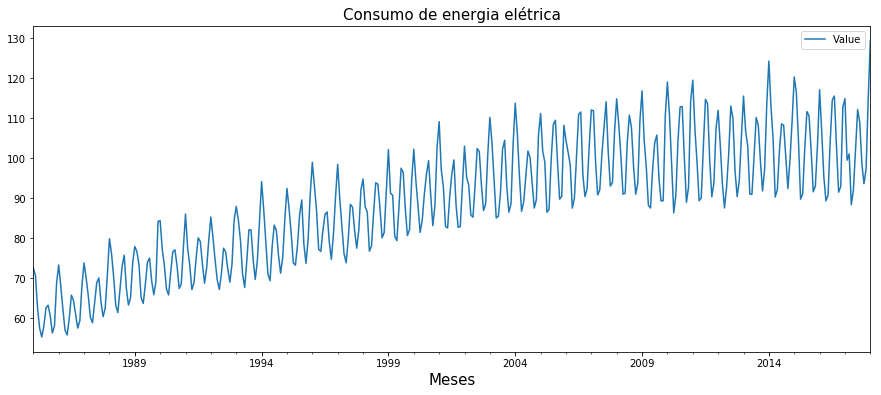

In [10]:
data.plot()
plt.xlabel('Meses',size=15)
plt.ylabel('')
plt.title('Consumo de energia elétrica',size=15)
plt.show()

## Aplicando o AutoARIMA

Escolherei os parâmetros *p, d, q, P, D* e *Q*:

1) o *p* vai variar entre 1 e 6;

2) o *q* vai variar entre 1 e 6;

3) a sazonalidade será mensal (m=12);

4) o *P* iniciará em 0 e o máximo, por padrão, será 2;

5) o *Q* por padrão será 1 e o máximo, por padrão, será 2;

6) o *d* será 1 e o máximo, por padrão, será 2;

7) o *D* será 1, por padrão já é 1.

Vamos agora aplicar o processamento do *autoARIMA*.

Vamos atribuir a uma variável o *autoARIMA*, que gerará vários modelos ARIMA e os seus respectivos AIC's e BICS (critérios de informação).

In [12]:
stepwise=auto_arima(data,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=2012.117, BIC=2020.018, Time=0.660 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1942.041, BIC=1957.844, Time=0.789 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1837.289, BIC=1853.091, Time=0.835 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=2010.162, BIC=2014.112, Time=0.027 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=1974.343, BIC=1986.195, Time=0.124 seconds
Fit ARIMA(0,1,1)x(1,1,1,12) [intercept=True]; AIC=1838.537, BIC=1858.290, Time=0.904 seconds
Fit ARIMA(0,1,1)x(0,1,2,12) [intercept=True]; AIC=1837.962, BIC=1857.716, Time=4.563 seconds
Fit ARIMA(0,1,1)x(1,1,0,12) [intercept=True]; AIC=1925.284, BIC=1941.086, Time=0.385 seconds
Fit ARIMA(0,1,1)x(1,1,2,12) [intercept=True]; AIC=1837.164, BIC=1860.868, Time=3.092 seconds
Fit ARIMA(0,1,1)x(2,1,2,12) [intercept

O modelo que foi gerado é um *SARIMA*(1,1,1)x(2,1,2,12).

In [14]:
stepwise

ARIMA(order=(1, 1, 1), seasonal_order=(2, 1, 2, 12), suppress_warnings=True)

Esse foi o model com menor *AIC* gerado.

In [13]:
stepwise.aic()

1770.2117855197191

Podemos gerar ainda mais modelos colocando o parâmetro *stepwise* com *False*.

In [15]:
stepwise1=auto_arima(data,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=2012.117, BIC=2020.018, Time=0.060 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=1864.145, BIC=1875.997, Time=0.404 seconds
Fit ARIMA(0,1,0)x(0,1,2,12) [intercept=True]; AIC=1865.415, BIC=1881.217, Time=2.886 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=1955.902, BIC=1967.754, Time=0.335 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=1865.702, BIC=1881.504, Time=0.520 seconds
Fit ARIMA(0,1,0)x(1,1,2,12) [intercept=True]; AIC=1864.184, BIC=1883.938, Time=2.418 seconds
Fit ARIMA(0,1,0)x(2,1,0,12) [intercept=True]; AIC=1899.730, BIC=1915.533, Time=1.063 seconds
Fit ARIMA(0,1,0)x(2,1,1,12) [intercept=True]; AIC=1855.606, BIC=1875.360, Time=1.328 seconds
Fit ARIMA(0,1,0)x(2,1,2,12) [intercept=True]; AIC=1854.602, BIC=1878.306, Time=3.790 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=1974.343, BIC=1986.195, Time=0.122 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1837.289, BIC=1853.0

Fit ARIMA(3,1,1)x(1,1,0,12) [intercept=True]; AIC=1868.390, BIC=1896.044, Time=3.596 seconds
Fit ARIMA(3,1,2)x(0,1,0,12) [intercept=True]; AIC=1917.822, BIC=1945.476, Time=0.762 seconds
Fit ARIMA(4,1,0)x(0,1,0,12) [intercept=True]; AIC=1957.596, BIC=1981.300, Time=0.291 seconds
Fit ARIMA(4,1,0)x(0,1,1,12) [intercept=True]; AIC=1821.288, BIC=1848.942, Time=0.925 seconds
Fit ARIMA(4,1,0)x(1,1,0,12) [intercept=True]; AIC=1907.257, BIC=1934.911, Time=0.917 seconds
Fit ARIMA(4,1,1)x(0,1,0,12) [intercept=True]; AIC=1912.529, BIC=1940.184, Time=1.629 seconds
Fit ARIMA(5,1,0)x(0,1,0,12) [intercept=True]; AIC=1952.744, BIC=1980.398, Time=0.439 seconds
Total fit time: 265.451 seconds


O modelo com menor *AIC* foi um pouco diferente do anterior, pois o componente sazonal *D* é 1 ao invés de 2.

In [18]:
stepwise1

ARIMA(order=(1, 1, 1), seasonal_order=(2, 1, 1, 12), suppress_warnings=True)

O *AIC* desse modelo foi um pouco maior que o anterior.

In [17]:
stepwise1.aic()

1771.2861792622257

## Separando os dados de treino e de teste

Vamos agora usar o *autoARIMA* para gerar uma validação do modelo. Para isso iremos separar os dados em treino e teste. Os dados de treino serão usado para treinar o *autoARIMA* e os dados de teste para comparar com as preisões geradas. Vamos separar as 12 últimas observações para dados de teste.

Irei colocar os dados de treino de janeiro de 1985 até janeiro de 2016 e os dados de teste será de fevereiro de 2016 em diante.

In [29]:
train=data.loc['1985-01-01':'2016-01-01']
test=data.loc['2016-01-02':]

Vamos treinar os modelos que geramos.

In [30]:
stepwise.fit(train)
stepwise1.fit(train)

ARIMA(order=(1, 1, 1), seasonal_order=(2, 1, 1, 12), suppress_warnings=True)

Vamos gerar as previsões de cada modelo.

In [31]:
future_forecast=stepwise.predict(n_periods=24)
future_forecast1=stepwise1.predict(n_periods=24)

Transformando as previsões em um *dataframe*.

In [33]:
future_forecast=pd.DataFrame(future_forecast,index=test.index, columns=['previsão modelo 1'])
future_forecast1=pd.DataFrame(future_forecast1,index=test.index, columns=['previsão modelo 2'])

Visualizando o *dataset* de previsões.

In [34]:
future_forecast.head(10)

,previsão modelo 1
DATE,
2016-02-01,110.269669
2016-03-01,101.509317
2016-04-01,90.072986
2016-05-01,91.997522
2016-06-01,102.873647
2016-07-01,112.410760
2016-08-01,111.147372
2016-09-01,100.649776
2016-10-01,91.965542


In [35]:
future_forecast1.head(10)

,previsão modelo 2
DATE,
2016-02-01,110.301030
2016-03-01,101.663363
2016-04-01,90.082859
2016-05-01,91.774326
2016-06-01,102.524193
2016-07-01,111.973888
2016-08-01,110.758220
2016-09-01,100.415516
2016-10-01,91.792411


Comparando graficamente os valores reais com as previsões, vemos que os resultados das previsões parecem acompanhar bem o valores reais.

<Figure size 1440x360 with 0 Axes>

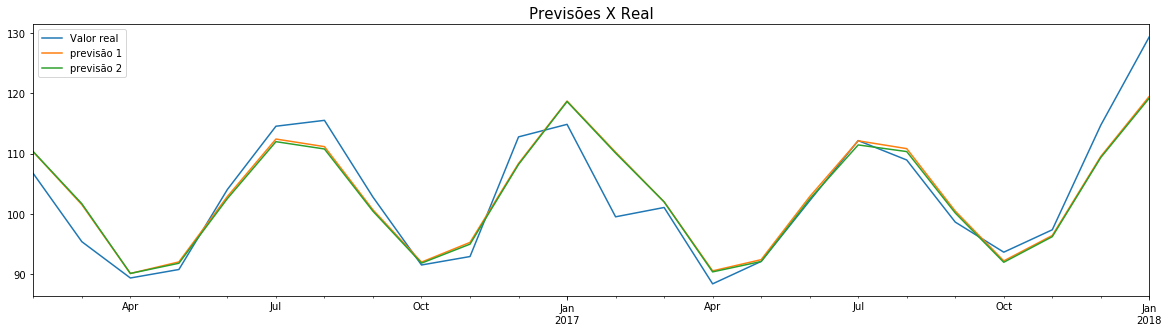

In [40]:
plt.figure(figsize=(20,5))
pd.concat([test,future_forecast,future_forecast1],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.legend(['Valor real','previsão 1','previsão 2'])
plt.show();

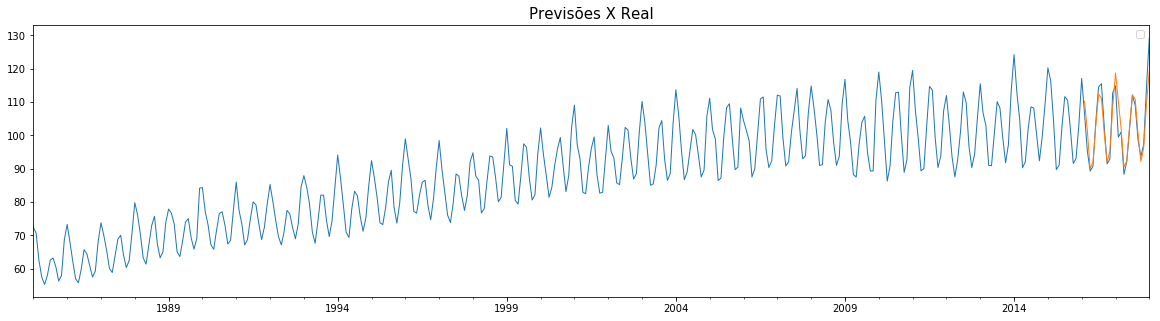

In [44]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=1,figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

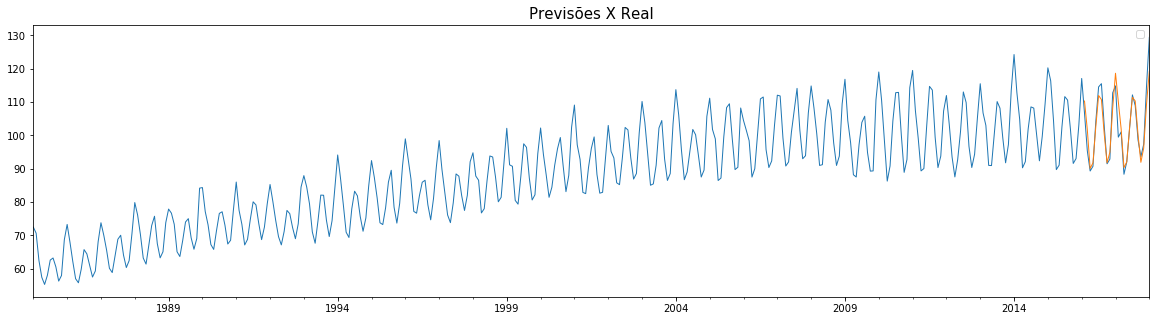

In [42]:
pd.concat([data,future_forecast1],axis=1).plot(linewidth=1, figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

## Sumário dos modelos

Abaixo podemos conferir os sumários dos modelos com seus coeficientes, estatísticas e p-valores.

Podemos ver que no sumário em *model* que no valor do *D* está [1,2], ou seja, já está informando a possibilidade de ser com *D* igual a 1 ou *D* igual a 2, mas o restante do sumário diz respeito ao modelo 1.

In [45]:
stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  373
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -804.147
Date:                                 Wed, 28 Oct 2020   AIC                           1624.295
Time:                                         00:57:57   BIC                           1655.383
Sample:                                              0   HQIC                          1636.656
                                                 - 373                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0024      0.001     -2.519      0.012      -0.004      -0.001
ar.L1          0.5446      0.044     12.310      0.000       0.458       0.631
ma.L1         -0.9959      0.019    -53.281      0.000      -1.033      -0.959
ar.S.L12       0.3809      0.332      1.148      0.251      -0.270       1.031
ar.S.L24      -0.2060      0.071     -2.905      0.004      -0.345      -0.067
ma.S.L12      -1.0434      0.334     -3.124      0.002      -1.698      -0.389
ma.S.L24       0.2976      0.261      1.139      0.255      -0.215       0.810
sigma2         4.8622      0.336     14.477      0.000       4.204       5.521
===================================================================================
Ljung-Box (Q):                       48.54   Jarque-Bera (JB):                10.45
Prob(Q):                              0.17   Prob(JB):                         0.01
Heteroskedasticity (H):               2.33   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Simário do modelo 2.

In [47]:
stepwise1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  373
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -803.926
Date:                            Wed, 28 Oct 2020   AIC                           1621.851
Time:                                    01:00:29   BIC                           1649.054
Sample:                                         0   HQIC                          1632.668
                                            - 373                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0036      0.001     -3.236      0.001      -0.006      -0.001
ar.L1          0.5329      0.049     10.950      0.000       0.438       0.628
ma.L1         -0.9796      0.014    -70.594      0.000      -1.007      -0.952
ar.S.L12       0.0050      0.082      0.061      0.951      -0.156       0.166
ar.S.L24      -0.1876      0.065     -2.899      0.004      -0.315      -0.061
ma.S.L12      -0.6584      0.075     -8.761      0.000      -0.806      -0.511
sigma2         4.9120      0.335     14.646      0.000       4.255       5.569
===================================================================================
Ljung-Box (Q):                       47.93   Jarque-Bera (JB):                11.72
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               2.32   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Análise dos resíduos

Uma das principais etapas é a avaliação dos resíduos. Primeiramente vamos olhar o *rmse* que é umas das principais métricas para análise dos erros, onde ele compara valores reais com os preditos. Aqui é interessante que o resultado seja o mais próximo possível de zero.

Podemos ver que o modelo com melhor desempenho foi o modelo 1.

In [48]:
print("RMSE do modelo 1: %.3f" % np.sqrt(mean_squared_error(test, future_forecast)))
print('')
print("RMSE do modelo 2: %.3f" % np.sqrt(mean_squared_error(test, future_forecast1)))

RMSE do modelo 1: 3.973

RMSE do modelo 2: 4.030


Calculando os erros de cada um dos modelos.

In [49]:
erros=pd.DataFrame(np.array(future_forecast.values.tolist())-np.array(test.values.tolist()))

erros1=pd.DataFrame(np.array(future_forecast1.values.tolist())-np.array(test.values.tolist()))

Vamos ver graficamente a distribuião dos resíduos dos modelos: são bem semelhantes e se assemelham com uma distribuição normal.

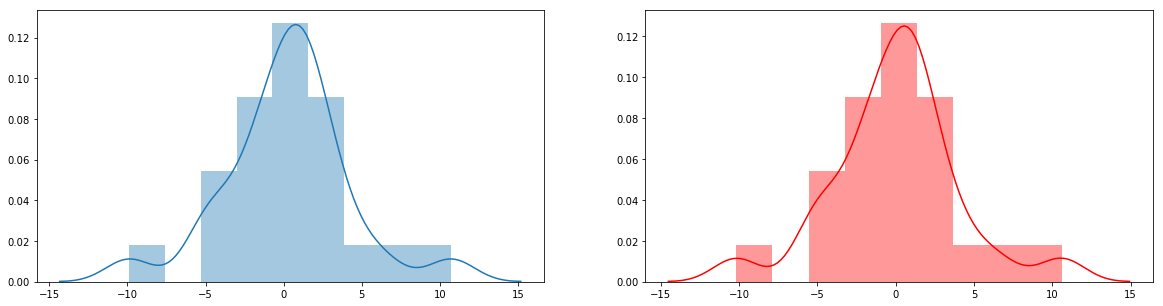

In [52]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(erros,ax=ax[0])
sns.distplot(erros1,ax=ax[1], color='red');

### Teste de normalidade dos resíduos

Para sabermos se a distribuição dos resíduos é ou não normal precisaremos realizar um teste estatístico chamado Teste de Normalidade *Jarque-Bera*. O teste Jarque-Bera testa se a distribuição dos dados é uma distribuição normal ($H_{0}$) em comparação com uma hipótese alternativa ($H_{1}$) em que os dados seguem alguma outra distribuição. A estatística do teste é baseada em dois momentos dos dados, a assimetria e a curtose, e possui uma $\chi^{2}_{2;1-\alpha}$ distribuição assintótica.

A estatística do teste Jarque-Bera é dada pela equação abaixo:

$S_{JB} = T\bigg[\frac{\alpha_{1}^{2}}{6} + \frac{\big(\alpha_{2} - 3\big)^{2}}{24} \bigg]$, onde $\alpha_{1}$ é o coeficiente de assimetria e $\alpha_{2}$ o coeficiente de curtose.

Se $S_{JB} > \chi^{2}_{2;1-\alpha}$, devemos rejeitar $H_{0}$.

Para o primeiro modelo o *p-value* teve um valor de 0.3746892, bem acima do nível de significância de 5% (que será o nosso padrão). Então podemos considerar que os resíduos do modelo 1 possuem uma distribuição normal.

In [53]:
test = jarque_bera(erros)
print('Estatística Jarque-Bera :', test[0])
print('p-valor :', test[1])
print('Assimetria :', test[2])
print('Curtose :',test[3])

Estatística Jarque-Bera : [1.96331679]
p-valor : [0.3746892]
Assimetria : [0.04171304]
Curtose : [4.39869828]


Para o modelo 2, o *p-value* foi um pouco maior (0.4257611) e também podemos considerar que seus resíduos são normais.

In [54]:
test1 = jarque_bera(erros1)
print('Estatística Jarque-Bera :', test1[0])
print('p-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

Estatística Jarque-Bera : [1.70775374]
p-valor : [0.42576111]
Assimetria : [0.07859143]
Curtose : [4.29732312]


## Conclusão

Para concluirmos levando em consideração a métrica de *RMSE* o modelo 1 foi melhor e pode ser escolhido para gerar previsões.

In [56]:
stepwise.fit(data)

ARIMA(order=(1, 1, 1), seasonal_order=(2, 1, 2, 12), suppress_warnings=True)

Vamos criar 24 previsões para um futuro fora da séries original.

In [80]:
future_forecast2=stepwise.predict(n_periods=24)

Vamos transformar em um *dataframe* e indexar para o tempo que queremos no futuro.

In [82]:
future_forecast2=pd.DataFrame(future_forecast2, 
                              index=pd.date_range(start='2018-01-02',
                                                  end='2020-01-02', freq='MS'),columns=['nova previsão'])

Vamos observar essas novas previsões.

In [83]:
future_forecast2.head(24)

,nova previsão
2018-02-01,113.885505
2018-03-01,105.446363
2018-04-01,91.483976
2018-05-01,93.037645
2018-06-01,102.880687
2018-07-01,111.967956
2018-08-01,109.938729
2018-09-01,100.154974
2018-10-01,92.590556
2018-11-01,96.991323


E agora vamos ver graficamente.

<Figure size 1440x360 with 0 Axes>

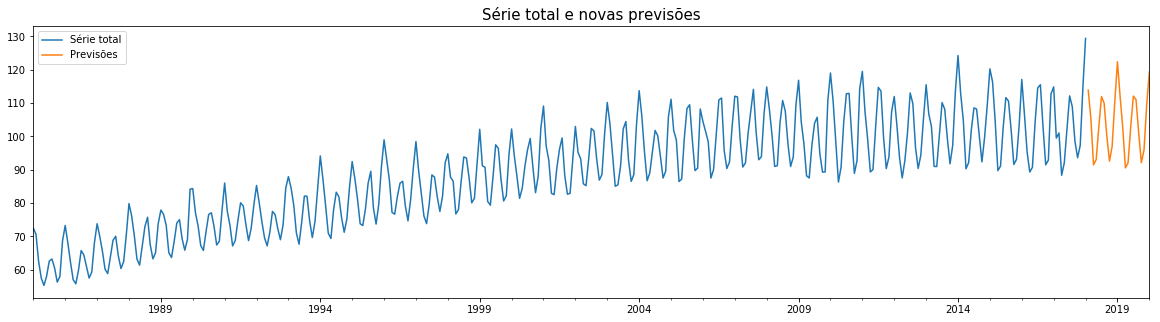

In [84]:
plt.figure(figsize=(20,5))
pd.concat([data,future_forecast2],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Série total e novas previsões',size=15)
plt.legend(['Série total','Previsões'])
plt.show();